In [10]:
import pandas as pd
import numpy as np
import random
import altair as alt
import requests
import inspect
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pyvis
from pyvis import network as net
from itertools import combinations
from community import community_louvain
from copy import deepcopy

In [11]:
# storing the credentials:
CLIENT_ID = "116bae2a86fd4737862816c5f45d4c36"
CLIENT_SECRET = "4f4a732d83d04cfa94acc26d2b77169f"
my_username = "sx47r9lq4dwrjx1r0ct9f9m09"

# instantiating the client
# source: Max Hilsdorf (https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6)
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Importing Playlists

First, we imported both driving playlists (Midnight Driving Playlist and My Dads Driving Playlist) from Spotify into their own dataframe.

In [3]:
# playlist_tracks(user_id: String, playlist_id: String): json_dict
midnight_playlist_tracks = pd.DataFrame(sp.user_playlist_tracks(playlist_id="0tjQYEAydt0REulno4PYiC"))
midnight_playlist_tracks

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
1,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
2,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
3,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
4,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
5,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
6,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
7,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
8,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15
9,https://api.spotify.com/v1/playlists/0tjQYEAyd...,"{'added_at': '2022-09-26T21:01:50Z', 'added_by...",100,None,0,None,15


In [4]:
# playlist_tracks(user_id: String, playlist_id: String): json_dict
dad_playlist_tracks = pd.DataFrame(sp.user_playlist_tracks(playlist_id="1jPGGXaawH9yUzTZBei5Hi"))
dad_playlist_tracks

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:41:19Z', 'added_by...",100,None,0,None,12
1,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:41:40Z', 'added_by...",100,None,0,None,12
2,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:41:47Z', 'added_by...",100,None,0,None,12
3,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:42:03Z', 'added_by...",100,None,0,None,12
4,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:42:22Z', 'added_by...",100,None,0,None,12
5,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:42:37Z', 'added_by...",100,None,0,None,12
6,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:43:38Z', 'added_by...",100,None,0,None,12
7,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:44:09Z', 'added_by...",100,None,0,None,12
8,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:44:31Z', 'added_by...",100,None,0,None,12
9,https://api.spotify.com/v1/playlists/1jPGGXaaw...,"{'added_at': '2022-09-26T20:44:41Z', 'added_by...",100,None,0,None,12


In [5]:
sample_track = midnight_playlist_tracks.iloc[0]["items"]["track"]

In [6]:
sample_track_audio_features = pd.DataFrame(sp.audio_features(sample_track["id"]))
sample_track_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.605,0.805,7,-7.805,1,0.0467,0.0581,0.937,0.0846,0.534,128.969,audio_features,38cy2yg41sWM96SKMeGUPL,spotify:track:38cy2yg41sWM96SKMeGUPL,https://api.spotify.com/v1/tracks/38cy2yg41sWM...,https://api.spotify.com/v1/audio-analysis/38cy...,220413,4


Next, we got the audio features dataframe using the function supplied in the M255 C notebook

In [7]:
# This function is created based on Max Hilsdorf's article
# Source: https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6
def get_audio_features_df(playlist):
    
    # Create an empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    for track in playlist["items"]:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the DataFrames
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

Additionally, we added a column to each dataframe corresponding to playlist_id and playlist_name, so that we would be able to group by playlist after we combined the two playlists into one dataframe.

We also reset the index so that the original position of a song in its playlist would be accessible in the combined dataframe.

In [8]:
midnight_audio_features_df = get_audio_features_df(midnight_playlist_tracks)
midnight_audio_features_df["playlist_id"] = "0tjQYEAydt0REulno4PYiC"
midnight_audio_features_df["playlist_name"] = "Midnight Monday Drive"
midnight_audio_features_df = midnight_audio_features_df.reset_index()
midnight_audio_features_df

,index,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_id,playlist_name
0,0,The Parlor Mob,Dark Hour,Setting With The Sun,38cy2yg41sWM96SKMeGUPL,0.605,0.805,7,-7.805,1,0.0467,0.937000,0.0846,0.5340,128.969,220413,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
1,1,Rich Brian,The Sailor,Drive Safe,6eDfe957aV4sqGnDhlSikJ,0.635,0.312,7,-8.134,1,0.0265,0.000000,0.1380,0.4140,98.017,240118,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
2,2,Russ,There's Really A Wolf,Ride Slow,6HK4YGOpZr1ost68QP3ul0,0.737,0.429,4,-10.252,0,0.0785,0.000000,0.1040,0.1470,99.955,185400,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
3,3,Sam Coury,wish.,wish.,3eozmuyjtrhpaitBmd1LcE,0.618,0.375,11,-13.285,0,0.0417,0.000004,0.1610,0.4470,142.016,331311,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
4,4,Tash Sultana,Flow State,Cigarettes,4eFTvwsYlTC0b0fjqxmrx7,0.563,0.755,11,-5.048,0,0.2480,0.000076,0.0562,0.5760,158.027,322716,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
5,5,Sam Coury,run!,run!,3baLS9Kc4MdhcnhWh4hDDm,0.593,0.513,4,-14.934,1,0.0356,0.000059,0.0740,0.6500,149.967,252578,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
6,6,High Highs,Cascades,Ocean to City,3lM46J2IddE8ihX7e39w7H,0.555,0.770,4,-7.241,1,0.0265,0.318000,0.2230,0.3210,131.921,271667,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
7,7,Magic Man,Before the Waves,Paris,4EaO2XR7gWaHq8DW7nu1iY,0.472,0.881,2,-5.252,1,0.0524,0.000000,0.0698,0.5020,178.858,232747,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
8,8,Digital Farm Animals,Tokyo Nights,Tokyo Nights,3TxKtkCNR1yQARsvHxvNnP,0.556,0.671,11,-6.366,0,0.0647,0.000377,0.1110,0.2520,105.057,243536,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive
9,9,M83,"Hurry Up, We're Dreaming",Midnight City,1eyzqe2QqGZUmfcPZtrIyt,0.526,0.712,11,-6.525,0,0.0356,0.000000,0.1790,0.3200,105.009,241440,4,0tjQYEAydt0REulno4PYiC,Midnight Monday Drive


In [9]:
dad_audio_features_df = get_audio_features_df(dad_playlist_tracks)
dad_audio_features_df["playlist_id"] = "1jPGGXaawH9yUzTZBei5Hi"
dad_audio_features_df["playlist_name"] = "My Dads Driving Playlist"
dad_audio_features_df = dad_audio_features_df.reset_index()
dad_audio_features_df

,index,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist_id,playlist_name
0,0,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,Free Bird,5EWPGh7jbTNO2wakv8LjUI,0.249,0.834,0,-8.210,1,0.0577,0.000095,0.0924,0.338,118.223,547107,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
1,1,Creedence Clearwater Revival,Green River (Expanded Edition),Bad Moon Rising,20OFwXhEXf12DzwXmaV7fj,0.508,0.774,2,-5.973,1,0.0321,0.000005,0.0630,0.942,178.946,141600,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
2,2,The Rolling Stones,The Rolling Stones Singles Collection: The Lon...,Sympathy For The Devil,75zMKn5euxQdlkZgu4P42J,0.728,0.681,9,-10.943,1,0.2210,0.000000,0.0559,0.578,115.944,376800,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
3,3,John Mellencamp,American Fool,Jack & Diane,43btz2xjMKpcmjkuRsvxyg,0.811,0.410,9,-8.214,1,0.0391,0.000007,0.0799,0.626,103.965,254493,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
4,4,Tom Petty,Full Moon Fever,Free Fallin',5tVA6TkbaAH9QMITTQRrNv,0.623,0.449,5,-13.333,1,0.0253,0.000000,0.0613,0.572,84.383,256000,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
5,5,The Who,Who's Next (Deluxe Edition),Baba O'Riley,3qiyyUfYe7CRYLucrPmulD,0.489,0.724,5,-8.367,1,0.0352,0.185000,0.2870,0.150,117.292,300400,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
6,6,Bruce Springsteen,Born To Run,Born to Run,6hTcuIQa0sxrrByu9wTD7s,0.270,0.944,4,-4.199,1,0.0975,0.000021,0.1160,0.606,146.347,269920,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
7,7,Bryan Adams,Reckless (30th Anniversary / Deluxe Edition),Summer Of '69,0GONea6G2XdnHWjNZd6zt3,0.508,0.834,2,-6.205,1,0.0386,0.000000,0.0732,0.774,139.131,216053,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
8,8,Journey,Escape (Bonus Track Version),Don't Stop Believin',4bHsxqR3GMrXTxEPLuK5ue,0.500,0.748,4,-9.072,1,0.0363,0.000000,0.4470,0.514,118.852,250987,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist
9,9,Kansas,Leftoverture (Expanded Edition),Carry on Wayward Son,4DMKwE2E2iYDKY01C335Uw,0.482,0.786,7,-5.735,1,0.0320,0.000089,0.4460,0.793,126.755,323000,4,1jPGGXaawH9yUzTZBei5Hi,My Dads Driving Playlist


Finally, we concatenated the two dataframes to get onec combined dataframe with both playlists included.

In [13]:
combined_df = pd.concat([midnight_audio_features_df, dad_audio_features_df], axis=0)
combined_df.reset_index(inplace=True)

# Research Questions

After combining the playlists into one dataframe, we set out to answer our research questions.

# **Energy**

#### How do the energies of the two playlists compare to each other?
We can see comparing the average energies of the two playlists that My Dads driving playlist is slightly higher in energy, but not by much.

#### How do the patterns of the energies of the two playlists compare to each other?
The two playlists also fit a similar pattern in the ernergy of respective songs. With only a few exceptions, many of the songs in the playlists have almost the same energy as their corresponding song from the other playlist. As such, the overall pattern of increasing and decreasing energy over the course of the playlist is very similar for both playlists.

In [14]:
combined_df.groupby("playlist_name").mean()['energy']

playlist_name
Midnight Monday Drive       0.619267
My Dads Driving Playlist    0.678000
Name: energy, dtype: float64

In [15]:
alt.Chart(combined_df).mark_point().encode(
    x=alt.X('index', sort=None),
    y='energy',
    color="playlist_name",
    tooltip=["artist", "track_name", "playlist_name"]
).properties(
    width=1200
)

alt.Chart(...)

# **Loudness**

#### How do the loudness of the two playlists compare to each other?
Again first we look at the averaged of the loudness in the two playlists, and we can see My Dads Driving Playlist is slightly louder than Midnight Monday Drive.

#### How do the patterns of the loudness of the two playlists compare to each other?


In [16]:
combined_df.groupby("playlist_name").mean()['loudness']

playlist_name
Midnight Monday Drive      -9.035400
My Dads Driving Playlist   -8.563083
Name: loudness, dtype: float64

In [17]:
alt.Chart(combined_df).mark_point().encode(
    x=alt.X("index", sort=None),
    y='loudness',
    color="playlist_name",
    tooltip=["artist", "track_name", "playlist_name"]
).properties(
    width=1200
)

alt.Chart(...)

# **Valence**

In [18]:
alt.Chart(combined_df).mark_point().encode(
    x=alt.X("index", sort=None),
    y='valence',
    color="playlist_name",
    tooltip=["artist", "track_name", "playlist_name"]
).properties(
    width=1200
)

alt.Chart(...)

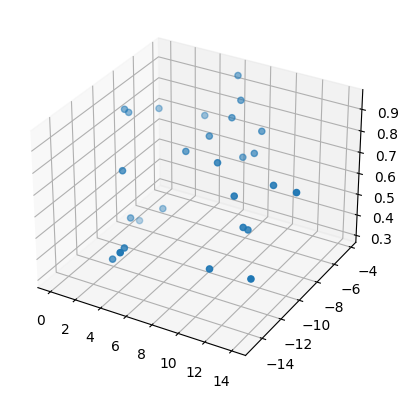

In [19]:
ax = plt.axes(projection='3d')

ax.scatter3D(combined_df['index'], combined_df['loudness'], combined_df['energy'])

# explanation:

Idea: use a 3D scatter with index as the x-axis, loudness as the y-axis, and energy as the z-axis.

Here, we wanted to view the tracks in order according to index as we did before, but also looking at both energy and loudness simultaneously. To do this, we used matplotlib's 3D scatter plot. We ran into problems with making this interactive like the previous altair plots were, and we didn't like how difficult it was to read the plot in any meaningful way. It is hard to tell which data points align with which playlist.

# **Radar Plots**

We set out to examine some questions about the playlists using radar plots. We had 2 main questions:
1. How do the songs in each playlist compare to each other in terms of danceability, energy, speechiness, liveness, instrumentalness, and valence?
2. How do the average values of the songs in each playlists compare to the other playlist in terms of the same categories?

In [20]:
import plotly.graph_objects as go
import plotly.offline as pyo

feature_columns = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence", "danceability"]

def createRadarElement(row, feature_cols):
    return go.Scatterpolar(
        r = row[feature_cols].values.tolist(), 
        theta = feature_cols, 
        mode = 'lines', 
        name = row['track_name'])

def get_radar_plot(playlist_id, features_list, file_name):
    current_playlist_audio_df = get_audio_features_df(pd.DataFrame(sp.playlist_items(playlist_id)))
    current_data = list(current_playlist_audio_df.apply(createRadarElement, axis=1, args=(features_list, )))  
    fig = go.Figure(current_data, )
    fig.write_image(file_name, width=1200, height=800)
    
def get_radar_plots(playlist_id_list, features_list):
    for item in playlist_id_list:
        get_radar_plot(item, features_list)
        
def get_radar_plot_df(playlist_df, features_list, file_name):
    current_playlist_audio_df = playlist_df
    current_data = list(current_playlist_audio_df.apply(createRadarElement, axis=1, args=(features_list, )))  
    fig = go.Figure(current_data, )
    fig.write_image(file_name, width=1200, height=800)

## Radar Plot of Midnight Driving Playlist Tracks

In [22]:
get_radar_plot("0tjQYEAydt0REulno4PYiC", feature_columns, "MidnightDrivingRadar.png")

## Radar Plot of My Dads Driving Playlist Tracks

In [23]:
get_radar_plot("1jPGGXaawH9yUzTZBei5Hi", feature_columns, "DadsDrivingRadar.png")

## Radar Plot of the Average Values in Midnight Driving Playlist and My Dads Driving Playlist

In [24]:
mean_combined_df = combined_df.groupby('playlist_id').mean()
mean_combined_df['track_name'] = ("Midnight Monday Drive", "My Dads Driving Playlist")
get_radar_plot_df(mean_combined_df, feature_columns, "CombinedRadar.png")

# Bar Plot of the Standard Deviation of Values in Both Playlists

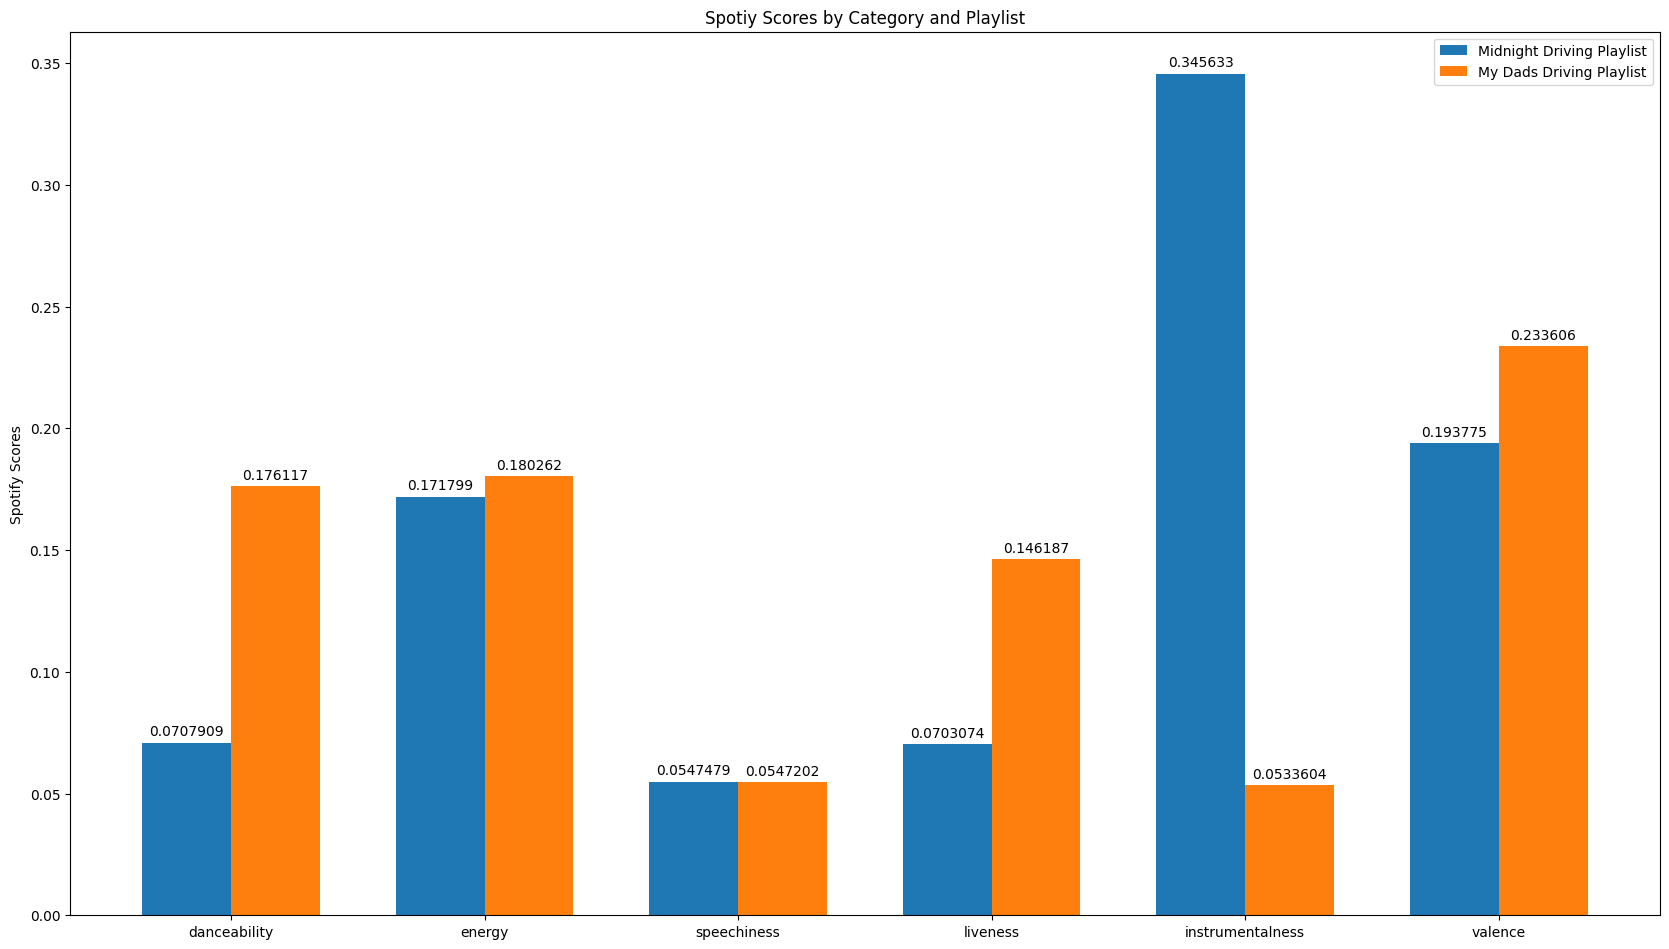

In [26]:
std_combined_df = combined_df.groupby('playlist_id').std()
std_combined_df['track_name'] = ("Midnight Monday Drive", "My Dads Driving Playlist")
# std_combined_df
# plt.bar(x=["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence", "danceability"],
#         height=std_combined_df[["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence", "danceability"]])
# std_combined_df[["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence", "danceability"]]


# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

labels = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence"]
midnight_std = list(std_combined_df[["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence"]].iloc[0])
dads_std = list(std_combined_df[["danceability", "energy", "speechiness", "liveness", "instrumentalness", "valence"]].iloc[1])

x = np.arange(len(labels))
width = .35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, midnight_std, width, label='Midnight Driving Playlist')
rects2 = ax.bar(x + width/2, dads_std, width, label='My Dads Driving Playlist')

ax.set_ylabel('Spotify Scores')
ax.set_title('Spotiy Scores by Category and Playlist')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

plt.savefig('StandardDevBarChart.png')
